### 1. Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from datetime import date
pd.set_option('display.max_columns', None)

#### 2. Define paths

In [3]:
RAW_PATH = "../data/raw/matches.csv"  
PROCESSED_PATH = "../data/processed/matches_processed.csv"

### 3. Load dataset

In [4]:
df = pd.read_csv(RAW_PATH)
print("Shape:", df.shape)
df.head()

Shape: (230557, 48)


C:\Users\Renan Muniz\AppData\Local\Temp\ipykernel_11992\1604719084.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(RAW_PATH)


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,0.0,3.0,1.0,H,2.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.3,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,0.0,3.0,1.0,H,1.0,1.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.4,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,0.0,0.0,1.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,0.0,0.0,1.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,3.3,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,0.0,1.0,1.0,D,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.3,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Feature Engineering

In [5]:
# Separating into SP1 (Spain firts division)
df = df[df['Division'].isin(['SP1'])]

In [6]:
df['HomeTeam'].value_counts()

HomeTeam
Real Madrid    452
Ath Bilbao     451
Barcelona      450
Valencia       450
Villarreal     431
Sevilla        431
Espanol        413
Ath Madrid     413
Sociedad       391
Osasuna        376
Betis          374
Getafe         356
Celta          342
Mallorca       318
Malaga         297
La Coruna      280
Valladolid     266
Vallecano      247
Levante        242
Alaves         228
Granada        190
Zaragoza       183
Santander      183
Almeria        152
Las Palmas     133
Eibar          133
Sp Gijon       114
Girona          95
Cadiz           95
Elche           95
Leganes         95
Recreativo      57
Numancia        52
Murcia          38
Tenerife        38
Huesca          38
Albacete        33
Oviedo          19
Xerez           19
Hercules        19
Cordoba         19
Name: count, dtype: int64

In [7]:
df['AwayTeam'].value_counts()

AwayTeam
Barcelona      451
Real Madrid    450
Valencia       450
Ath Bilbao     449
Sevilla        432
Villarreal     431
Espanol        412
Ath Madrid     412
Sociedad       394
Betis          375
Osasuna        374
Getafe         355
Celta          342
Mallorca       317
Malaga         298
La Coruna      280
Valladolid     266
Vallecano      247
Levante        243
Alaves         228
Granada        190
Santander      185
Zaragoza       184
Almeria        152
Eibar          133
Las Palmas     133
Sp Gijon       114
Girona          95
Cadiz           95
Leganes         95
Elche           95
Recreativo      57
Numancia        51
Murcia          38
Tenerife        38
Huesca          38
Albacete        33
Oviedo          19
Xerez           19
Cordoba         19
Hercules        19
Name: count, dtype: int64

In [8]:
# Verifing Nans
df.isna().mean().sort_values(ascending=False)

MatchTime      0.746892
C_PHB          0.198601
MaxOver25      0.198601
Under25        0.198601
C_VHD          0.198601
C_VAD          0.198601
Over25         0.198601
MaxUnder25     0.198601
C_HTB          0.198601
C_LTA          0.198601
C_LTH          0.198601
HomeTarget     0.198490
AwayShots      0.198490
HomeShots      0.198490
HomeFouls      0.198490
AwayFouls      0.198490
AwayCorners    0.198490
HomeCorners    0.198490
MaxDraw        0.198490
MaxAway        0.198490
HomeRed        0.198490
AwayYellow     0.198490
HomeYellow     0.198490
AwayRed        0.198490
MaxHome        0.198490
AwayTarget     0.198490
HandiAway      0.131106
HandiHome      0.131106
HandiSize      0.129885
OddHome        0.009991
OddDraw        0.009991
OddAway        0.009991
HTAway         0.000000
HTHome         0.000000
FTResult       0.000000
FTAway         0.000000
FTHome         0.000000
Form5Away      0.000000
Form3Away      0.000000
Form5Home      0.000000
Form3Home      0.000000
AwayElo        0

In [9]:
# Dropping MatchTime
df.drop(columns=['MatchTime'], inplace= True )
# Filling Nans
df = df.fillna(0) 

In [10]:
# Using label encoder to transfor Full Time Results into Results
# FTResults = A -- Results = 0
# FTResults = H -- Results = 2
# FTResults = D -- Results = 1
le = LabelEncoder()
df['Results'] = le.fit_transform(df['FTResult'])

In [11]:
df['Results'].value_counts(normalize=True)

Results
2    0.470915
0    0.276976
1    0.252109
Name: proportion, dtype: float64

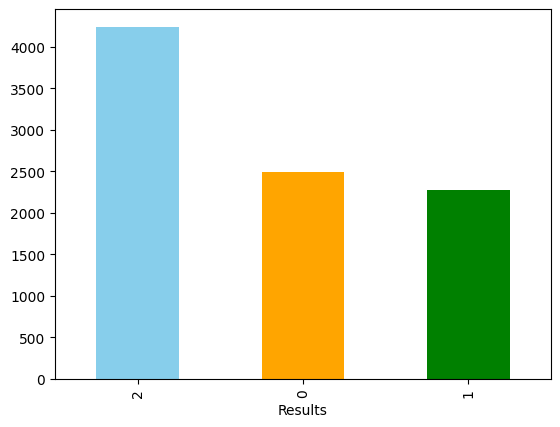

In [12]:
# Results Graph
df['Results'].value_counts().plot(kind='bar', color=['skyblue','orange','green'])
plt.xlabel("Results")
plt.show()


Changing MatchDate to date time type:
- `Year`
- `Month`: (1-12)
- `Day`: (1-31)
- `DayOfWeek`: (Monday = 0, Sunday = 6)
- `IsWeekend`: (1 = Saturday/Sunday, 0 = weekdays)



In [13]:
df['MatchDate'] = pd.to_datetime(df['MatchDate'])
df['Year'] = df['MatchDate'].dt.year 
df['Month'] = df['MatchDate'].dt.month 
df['Day'] = df['MatchDate'].dt.day 
df['DayOfWeek'] = df['MatchDate'].dt.dayofweek 
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

1. **EloDifference**: Difference between the home team's and away team's Elo ratings, indicating the relative strength of the teams.

2. **Implied Probabilities**: We take the betting odds from Bet365 and convert them into probabilities for each possible outcome of a match:
   - `ImpliedProbHome`: The chance the home team will win.
   - `ImpliedProbDraw`: The chance the match ends in a draw.
   - `ImpliedProbAway`: The chance the away team will win.

3. **Double Chance Odds**: These consider two possible outcomes at once, giving a sense of safer bets:
   - `Home_odds`: The chance the home team wins or the game is a draw.
   - `Away_odds`: The chance the away team wins or the game is a draw.
   - `Home_Away_Odds`: The chance that either team wins (ignoring a draw).

4. **Form Differences**: How teams have been performing recently, comparing the last few games:
   - `Form3Difference`: Difference in points between home and away teams over the last 3 matches.
   - `Form5Difference`: Difference in points over the last 5 matches.

5. **ImpliedProbTotal**: The combined probability of a home or away win, showing the market's overall expectation for a decisive result.

6. **BookmakerMargin**: The “built-in profit” of the bookmaker, calculated as the sum of implied probabilities minus 1. A higher margin means the market is less favorable to the bettor.


In [14]:
df['EloDifference'] = df['HomeElo'] - df['AwayElo']

df['ImpliedProbHome'] = 1 / df['OddHome'] 
df['ImpliedProbDraw'] = 1 / df['OddDraw'] 
df['ImpliedProbAway'] = 1 / df['OddAway'] 

df['Home_odds'] = 1 / (df['ImpliedProbHome'] + df['ImpliedProbDraw']) 
df['Away_odds'] = 1/ (df['ImpliedProbAway'] + df['ImpliedProbDraw']) 
df['Home_Away_Odds'] = 1 / (df['ImpliedProbHome'] + df['ImpliedProbAway'])

df['Form3Difference'] = df['Form3Home'] - df['Form3Away'] 
df['Form5Difference'] = df['Form5Home'] - df['Form5Away'] 

df['ImpliedProbTotal'] = df['ImpliedProbHome'] + + df['ImpliedProbAway'] 

df['BookmakerMargin'] = df['ImpliedProbTotal'] - 1 

1. **GF3Home**: Goals scored by the home team in the last 3 home matches.  
2. **GF3Away**: Goals scored by the away team in the last 3 away matches.  

3. **GA3Home**: Goals conceded by the home team in the last 3 home matches.  
4. **GA3Away**: Goals conceded by the away team in the last 3 away matches.  

5. **GF5Home**: Goals scored by the home team in the last 5 home matches.  
6. **GF5Away**: Goals scored by the away team in the last 5 away matches.  

7. **GA5Home**: Goals conceded by the home team in the last 5 home matches.  
8. **GA5Away**: Goals conceded by the away team in the last 5 away matches.  

> **Note**: Missing values are filled with 0, assuming no goals if there are fewer than 3 or 5 previous matches available.

In [15]:
# Separating into HomeTeam/AwayTeam and MatchDate 
df2 = df.sort_values(['HomeTeam', 'MatchDate'])
df3 = df.sort_values(['AwayTeam', 'MatchDate'])

df['GF3Home'] = df2.groupby('HomeTeam')['FTHome'].shift(1).rolling(3).sum().reindex(df.index)
df['GF3Away'] = df3.groupby('AwayTeam')['FTAway'].shift(1).rolling(3).sum().reindex(df.index)


df['GA3Home'] = df2.groupby('HomeTeam')['FTAway'].shift(1).rolling(3).sum().reindex(df.index)
df['GA3Away'] = df3.groupby('AwayTeam')['FTHome'].shift(1).rolling(3).sum().reindex(df.index)


df['GF5Home'] =  df2.groupby('HomeTeam')['FTHome'].shift(1).rolling(5).sum().reindex(df.index)
df['GF5Away'] = df3.groupby('AwayTeam')['FTAway'].shift(1).rolling(5).sum().reindex(df.index)

df['GA5Home'] = df2.groupby('HomeTeam')['FTAway'].shift(1).rolling(5).sum().reindex(df.index)
df['GA5Away'] = df3.groupby('AwayTeam')['FTHome'].shift(1).rolling(5).sum().reindex(df.index)

# Filling the Nans
df[['GF3Away', 'GF3Home', 'GF5Away', 'GF5Home','GA5Away', 'GA5Home', 'GA3Home', 'GA3Away']] = df[['GF3Away', 'GF3Home', 'GF5Away', 'GF5Home','GA5Away', 'GA5Home', 'GA3Home', 'GA3Away']].fillna(0) 




**Win Streaks**  
- **WinStreakHome**: Number of consecutive wins for the home team before the current match.  
- **WinStreakAway**: Number of consecutive wins for the away team before the current match.  

**Draw Streaks**  
- **DrawStreakHome**: Number of consecutive draws for the home team before the current match.  
- **DrawStreakAway**: Number of consecutive draws for the away team before the current match.  

**Defeat Streaks**  
- **DefeatStreakHome**: Number of consecutive losses for the home team before the current match.  
- **DefeatStreakAway**: Number of consecutive losses for the away team before the current match.  

> **Note:** These features are calculated using the `Results` column where `2 = Home Win`, `1 = Draw`, and `0 = Away Win`. Missing values are filled with 0 to indicate no previous streak.

In [16]:
# STREAKS
winshome = df2.groupby('HomeTeam')['Results'].transform(
    lambda x: x.eq(2).astype(int)
                    .groupby((x != 2).cumsum())  
                    .cumsum()
                    .shift(1)
).fillna(0)
df['WinStreakHome'] = winshome.reindex(df.index)


winsaway = df3.groupby('AwayTeam')['Results'].transform(
    lambda x: x.eq(0).astype(int)
                    .groupby((x != 0).cumsum())  
                    .cumsum()
                    .shift(1)
).fillna(0)
df['WinStreakAway'] = winsaway.reindex(df.index)



drawhome = df2.groupby('HomeTeam')['Results'].transform(
    lambda x: x.eq(1).astype(int)
                    .groupby((x != 1).cumsum())  
                    .cumsum()
                    .shift(1)
).fillna(0)
df['DrawStreakHome'] = drawhome.reindex(df.index)


drawaway = df3.groupby('AwayTeam')['Results'].transform(
    lambda x: x.eq(1).astype(int)
                    .groupby((x != 1).cumsum())  
                    .cumsum()
                    .shift(1)
).fillna(0)
df['DrawStreakAway'] = drawaway.reindex(df.index)




defeathome = df2.groupby('HomeTeam')['Results'].transform(
    lambda x: x.eq(0).astype(int)
                    .groupby((x != 0).cumsum())  
                    .cumsum()
                    .shift(1)
).fillna(0)
df['DefeatStreakHome'] = defeathome.reindex(df.index)


defeataway = df3.groupby('AwayTeam')['Results'].transform(
    lambda x: x.eq(2).astype(int)
                    .groupby((x != 2).cumsum())  
                    .cumsum()
                    .shift(1)
).fillna(0)
df['DefeatStreakAway'] = defeataway.reindex(df.index)

##### Head-to-Head (H2H) Features

- **H2HHomeWins**: Number of home wins against the same away team in the last 5 head-to-head matches (excluding the current match).  
- **H2HAwayWins**: Number of away wins against the same home team in the last 5 head-to-head matches (excluding the current match).  

> **Note:**  
> 1. The dataset is first sorted by `HomeTeam`, `AwayTeam`, and `MatchDate`.  
> 2. Shifts are applied to ensure only previous matches are counted.  
> 3. A rolling sum over the last 5 matches is used to calculate the feature, with `min_periods=1` to handle teams with fewer than 5 previous encounters.


In [17]:
df4 = df.sort_values(['HomeTeam', 'AwayTeam', 'MatchDate'])
h2hhome =  df4.groupby(['HomeTeam', 'AwayTeam'])['Results'].transform(lambda x: (x.shift(1) == 2).rolling(5, min_periods=1).sum())
df['H2HHomeWins'] = h2hhome.reindex(df.index)

h2haway =  df4.groupby(['AwayTeam','HomeTeam'])['Results'].transform(lambda x: (x.shift(1) == 0).rolling(5, min_periods=1).sum())
df['H2HAwayWins'] = h2haway.reindex(df.index)

##### Momentum Features
Designed to capture how teams have been performing recently, helping to identify trends in their scoring.

- **GF_EMA3_Home**: The “recent scoring form” of the home team by averaging the goals they scored in their last matches, giving more weight to the most recent ones.   
- **GF_EMA3_Away**: Same as above, but for the away team. It reflects how well the away team has been scoring lately.

- **GF3HomeSTD**: Measures how consistent the home team’s scoring has been over their last 3 home games. A higher number means their performance varies a lot; a lower number means they score fairly consistently. 
- **GF3AwaySTD**: Same as above, for the away team over their last 3 away games.


> **Note:** These statistics give an idea of each team's recent “momentum” — whether they’ve been scoring regularly, inconsistently, or improving.


In [18]:
# MOMENTUM
emahome = df2.groupby('HomeTeam')['FTHome'].shift(1).ewm(span=3).mean()
# Exponential moving average (span=3) of goals scored by home team in previous matches (shifted).
df['GF_EMA3_Home'] = emahome.reindex(df.index)

emaaway = df3.groupby('AwayTeam')['FTAway'].shift(1).ewm(span=3).mean()
# Exponential moving average (span=3) of goals scored by away team in previous matches (shifted).
df['GF_EMA3_Away'] = emaaway.reindex(df.index)


goalhome = df2.groupby('HomeTeam')['FTHome'].shift(1).rolling(3).std()
# Standard deviation of goals scored by home team in last 3 home matches.
df['GF3HomeSTD'] = goalhome.reindex(df.index).fillna(0)

goalaway = df3.groupby('AwayTeam')['FTAway'].shift(1).rolling(3).std()
# Standard deviation of goals scored by away team in last 3 away matches.
df['GF3AwaySTD'] = goalaway.reindex(df.index).fillna(0)



##### Points and Season Features

1. **Points in Current Match**: How many points each team earned in the current game (based on standard football rules):
   - `PointsHome`: Points earned by the home team (3 for a win, 1 for a draw, 0 for a loss).
   - `PointsAway`: Points earned by the away team (3 for a win, 1 for a draw, 0 for a loss).

2. **Season Column**: Indicates the football season for each match. If the match is in August or later, it belongs to the current year’s season; otherwise, it belongs to the previous year’s season.

3. **Cumulative Points**: Tracks the total points each team has earned so far in the season (excluding the current match):
   - `PointsAcumHome`: Total points accumulated by the home team in the current season.
   - `PointsAcumAway`: Total points accumulated by the away team in the current season.

In [19]:
points_home = {2:3, 1:1, 0:0}
df['PointsHome'] = df['Results'].map(points_home)

points_away = {0:3, 1:1, 2:0}
df['PointsAway'] = df['Results'].map(points_away)

df['Season'] = np.where(df['Month'] >= 8, df['Year'], df['Year'] - 1)

acumhome = df.groupby(['HomeTeam', 'Season'])['PointsHome'].transform(lambda x: x.shift(1).cumsum())
df['PointsAcumHome'] = acumhome.reindex(df.index).fillna(0)

acumaway = df.groupby(['AwayTeam', 'Season'])['PointsAway'].transform(lambda x: x.shift(1).cumsum())
df['PointsAcumAway'] = acumaway.reindex(df.index).fillna(0)


##### Goals

1. **Total Goals Scored**: Tracks the total number of goals each team has scored so far in the season (excluding the current match):
   - `GF_Total_Home`: Total goals scored by the home team.
   - `GF_Total_Away`: Total goals scored by the away team.

2. **Total Goals Conceded**: Tracks the total number of goals each team has conceded so far in the season (excluding the current match):
   - `GA_Total_Home`: Total goals conceded by the home team.
   - `GA_Total_Away`: Total goals conceded by the away team.

3. **Goal Difference**: Difference between goals scored and goals conceded for each team, reflecting the overall strength of the team in the season:
   - `GD_total_Home`: Goal difference for the home team (GF_Total_Home – GA_Total_Home).
   - `GD_total_Away`: Goal difference for the away team (GF_Total_Away – GA_Total_Away).

In [20]:
df2 = df.sort_values(['HomeTeam', 'MatchDate'])
df3 = df.sort_values(['AwayTeam', 'MatchDate'])
gf_home = df2.groupby(['HomeTeam', 'Season'])['FTHome'].transform(lambda x: x.shift(1).cumsum())
df['GF_Total_Home'] = gf_home.reindex(df.index).fillna(0)

gf_away = df3.groupby(['AwayTeam', 'Season'])['FTAway'].transform(lambda x: x.shift(1).cumsum())
df['GF_Total_Away'] = gf_away.reindex(df.index).fillna(0)

gf_home = df2.groupby(['HomeTeam', 'Season'])['FTAway'].transform(lambda x: x.shift(1).cumsum())
df['GA_Total_Home'] = gf_home.reindex(df.index).fillna(0)

gf_away = df3.groupby(['AwayTeam', 'Season'])['FTHome'].transform(lambda x: x.shift(1).cumsum())
df['GA_Total_Away'] = gf_away.reindex(df.index).fillna(0)

df['GD_total_Home'] = df['GF_Total_Home'] - df['GA_Total_Home']
df['GD_total_Away'] = df['GF_Total_Away'] - df['GA_Total_Away']


##### Mean per Game Features

1. **Average Points per Game**: Measures the typical performance of a team in terms of points earned per match (excluding the current match):
   - `PointMeanHome`: Average points per game for the home team.
   - `PointMeanAway`: Average points per game for the away team.

2. **Average Goals Scored per Game**: Measures how many goals a team scores on average in each match:
   - `ScoredGoalsMeanHome`: Average goals scored by the home team.
   - `ScoredGoalsMeanAway`: Average goals scored by the away team.

3. **Average Goals Conceded per Game**: Measures how many goals a team concedes on average per match:
   - `ConcededGoalsMeanHome`: Average goals conceded by the home team.
   - `ConcededGoalsMeanAway`: Average goals conceded by the away team.

4. **Average Goal Difference per Game**: Measures the net goal difference per match, reflecting the overall dominance of a team:
   - `GoalsDifferenceMeanHome`: Average goal difference for the home team (goals scored minus goals conceded).
   - `GoalsDifferenceMeanAway`: Average goal difference for the away team (goals scored minus goals conceded).

In [21]:
df['GameCount'] = 1
game_played_home = df.groupby(['HomeTeam', 'Season'])['GameCount'].transform(lambda x: x.shift(1).cumsum())
game_played_away = df.groupby(['AwayTeam', 'Season'])['GameCount'].transform(lambda x: x.shift(1).cumsum())

df['PointMeanHome'] = (df['PointsAcumHome'] / game_played_home).fillna(0)
df['PointMeanAway'] = (df['PointsAcumAway'] / game_played_away).fillna(0)

df['ScoredGoalsMeanHome']= (df['GF_Total_Home'] / game_played_home).fillna(0)
df['ScoredGoalsMeanAway']= (df['GF_Total_Away'] / game_played_away).fillna(0)

df['ConcededGoalsMeanHome']= (df['GA_Total_Home']/ game_played_home).fillna(0)
df['ConcededGoalsMeanAway']= (df['GA_Total_Away'] / game_played_away).fillna(0)

df['GoalsDifferenceMeanHome']= (df['GD_total_Home']/ game_played_home).fillna(0)
df['GoalsDifferenceMeanAway']= (df['GD_total_Away'] / game_played_away).fillna(0)

##### Win/Loss/Draw Rates and Cumulative Counts

1. **Binary Indicators for Match Outcome**:
   - `WinHome`: 1 if home team won the current match, 0 otherwise.
   - `Draw`: 1 if the match ended in a draw, 0 otherwise.
   - `WinAway`: 1 if away team won the current match, 0 otherwise.

2. **Cumulative Counts in Current Season** (excluding current match):
   - `WinHomeAcum`: Total home wins for the team in the current season.
   - `WinAwayAcum`: Total away wins for the team in the current season.
   - `DrawHomeAcum`: Total home draws for the team in the current season.
   - `DrawAwayAcum`: Total away draws for the team in the current season.
   - `LossHomeAcum`: Total home losses for the team in the current season.
   - `LossAwayAcum`: Total away losses for the team in the current season.

3. **Rates per Game**:
   - `WinRateHome`: Home team win rate (wins / games played at home).
   - `WinRateAway`: Away team win rate (wins / games played away).
   - `DrawRateHome`: Home team draw rate (draws / games played at home).
   - `DrawRateAway`: Away team draw rate (draws / games played away).
   - `LossRateHome`: Home team loss rate (losses / games played at home).
   - `LossRateAway`: Away team loss rate (losses / games played away).


In [22]:
df['WinHome'] = (df['FTResult'] == 'H').astype(int)
df['Draw'] = (df['FTResult'] == 'D').astype(int)
df['WinAway'] = (df['FTResult'] == 'A').astype(int)

df['WinHomeAcum'] = df.groupby(['HomeTeam', 'Season'])['WinHome'].transform(lambda x: x.shift(1).cumsum()).fillna(0)
df['WinAwayAcum'] = df.groupby(['AwayTeam', 'Season'])['WinAway'].transform(lambda x: x.shift(1).cumsum()).fillna(0)

df['DrawHomeAcum'] = df.groupby(['HomeTeam', 'Season'])['Draw'].transform(lambda x: x.shift(1).cumsum()).fillna(0)
df['DrawAwayAcum'] = df.groupby(['AwayTeam', 'Season'])['Draw'].transform(lambda x: x.shift(1).cumsum()).fillna(0)

df['LossHomeAcum'] = df['WinAwayAcum'].fillna(0)
df['LossAwayAcum'] = df['WinHomeAcum'] .fillna(0)


df['WinRateHome'] = (df['WinHomeAcum']  / game_played_home).fillna(0)
df['WinRateAway'] = (df['WinAwayAcum'] / game_played_away).fillna(0)

df['DrawRateHome'] = (df['DrawHomeAcum'] / game_played_home).fillna(0)
df['DrawRateAway'] = (df['DrawAwayAcum'] / game_played_away).fillna(0)

df['LossRateHome'] = (df['LossHomeAcum'] / game_played_home).fillna(0)
df['LossRateAway'] = (df['LossAwayAcum'] / game_played_away).fillna(0)

## Interaction and Derived Features

1. **Odds and Elo Related Features**: 
    - `OddsDifference`: Difference between the home team’s implied win probability and the away team’s implied win probability according to the odds. Shows which team is favored by the market.  
    - `EloRatio`: Relative strength of the home team compared to the away team based on Elo ratings.  
    - `Elo_ProbDiff`: Difference in probabilities weighted by Elo difference, emphasizing the stronger team’s advantage.  
    - `BookieBiasHome` and `BookieBiasAway`: Difference between the implied probability from the bookmaker and the team’s actual win rate. Highlights market over- or underestimation.

2. **Form and Performance Ratios**:
    - `FormRatio`: Compares recent form (last 3 matches) between home and away teams.  
    - `GoalRateRatio`: Ratio of average goals scored by home team to average goals scored by away team.  
    - `WinRateDiff`: Difference between home and away team win rates.  
    - `PointsDiff`: Difference in cumulative points between home and away teams in the season.  
    - `FormDiff`: Difference in points from the last 5 matches between home and away teams.  
    - `FormVolatility`: Difference in form changes between home and away teams (Form5 – Form3).  
    - `FormOddsDiff`: Combines recent form difference with probability difference (Home – Away).

3. **Streak Features**:
    - `StreakDiff`: Difference between home team’s winning streak and away team’s losing streak.

4. **Time and Cyclical Features**:
    - `DayOfWeek_sin` / `DayOfWeek_cos`: Sine and cosine encoding of the day of the week to handle cyclical nature.  
    - `Month_sin` / `Month_cos`: Sine and cosine encoding of the month to preserve cyclical information.  
    - `Day_sin` / `Day_cos`: Sine and cosine encoding of day of month.

5. **Odds-Form Combined Features**:
    - `EloOddsGap`: Difference between the market’s probability gap and the Elo-based probability ratio.  
    - `OddSkew`: Normalized skew between home and away odds, indicating imbalance in market pricing.


In [23]:

df["OddsDifference"] = df["ImpliedProbHome"] - df["ImpliedProbAway"]

df["EloRatio"] = df["HomeElo"] / (df["AwayElo"] + 1e-6)

df["FormRatio"] = df["Form3Home"] / (df["Form3Away"] + 1)

df["GoalRateRatio"] = df["ScoredGoalsMeanHome"] / (df["ScoredGoalsMeanAway"] + 1)

df["WinRateDiff"] = df["WinRateHome"] - df["WinRateAway"]

df["PointsDiff"] = df["PointsAcumHome"] - df["PointsAcumAway"]

df["FormDiff"] = df["Form5Home"] - df["Form5Away"]


df["Elo_ProbDiff"] = (df["ImpliedProbHome"] - df["ImpliedProbAway"]) * df["EloDifference"]
df["FormOddsDiff"] = df["Form5Difference"] * (df["ImpliedProbHome"] - df["ImpliedProbAway"])
df["StreakDiff"] = df["WinStreakHome"] - df["DefeatStreakAway"]
df["BookieBiasHome"] = df["ImpliedProbHome"] - df["WinRateHome"]

df["BookieBiasAway"] = df["ImpliedProbAway"] - df["WinRateAway"]
df["DayOfWeek_sin"] = np.sin(2 * np.pi * df["DayOfWeek"] / 7)
df["DayOfWeek_cos"] = np.cos(2 * np.pi * df["DayOfWeek"] / 7)

df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)

df["Day_sin"] = np.sin(2 * np.pi * df["Day"] / 31)
df["Day_cos"] = np.cos(2 * np.pi * df["Day"] / 31)


df['EloOddsGap'] = (df['ImpliedProbHome'] - df['ImpliedProbAway']) - (df['EloRatio'] / (1+df['EloRatio']))

df['FormVolatility'] = (df['Form5Home'] - df['Form3Home']) - (df['Form5Away'] - df['Form3Away'])

df['OddSkew'] = (df['OddHome'] - df['OddAway']) / (df['OddHome'] + df['OddAway'])


In [24]:
PROCESSED_PATH = "../data/processed/"
os.makedirs(PROCESSED_PATH, exist_ok=True)
df.to_csv(os.path.join(PROCESSED_PATH, "matches_processed.csv"), index=False)
print("Arquivo salvo em:", os.path.join(PROCESSED_PATH, "matches_processed.csv"))

Arquivo salvo em: ../data/processed/matches_processed.csv
